# Scikit-learn

In [34]:
from sklearn import datasets
diabetes = datasets.load_diabetes()  
X = diabetes.data # 442 observation , 10 features
y = diabetes.target

In [35]:
X.shape

(442, 10)

In [36]:
y.shape

(442,)

In [37]:
feature_names=['age', 'sex', 'bmi', 'bp',
               's1', 's2', 's3', 's4', 's5', 's6']

# Scikit example regression

In [38]:
import warnings; warnings.simplefilter('ignore')  # to suppress warnings

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()

# We will split our data into separate test and train sets of data 
# (train is used to train the model and test is used for 
# model performance testing and evaluation).

X_train = diabetes.data[:310] # 0 to 309 observations i.e 310 records
y_train = diabetes.target[:310]

X_test = diabetes.data[310:]
y_test = diabetes.target[310:]

# Lasso model
lasso = Lasso(random_state=0)  # random_state is like a seed point 
alphas = np.logspace(-4, -0.5, 30) #fine tuning just to keep in mind->(example digital radio)
# logspace computes its start and end points as
# base**start and base**stop respectively. 
# here start = -4 means 10**-4
# stop = -0.5 means 10**-0.5
# num = 30 means total number of values as 30 between the start and end range
# Numpy logspace return numbers spaced evenly on a log scale.


estimator = GridSearchCV(lasso,param_grid = dict(alpha=alphas))#gridsearch is predefine to help you not give a loop
                                                                #(dict is to make a key value pair)
#He is testing 30 lasso models over training data
    #-->But retain or remembers only 1 lasso model
    #---->therefore at the end only 1 lasso model or ML model is retained 
# GridSearchCV finds the lasso model.
# this means the lasso model with the best hyperparameter
# Our hyperparameter here is alpha #where alpha has 30 different values
# GridSearchCV test the lasso model performance for each alpha
# and finally creates a lasso model estimator object with the most optimum 
# alpha value.


estimator.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04,...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
estimator.best_score_

0.46170948106181975

In [40]:
estimator.best_estimator_

Lasso(alpha=0.07880462815669913, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

estimator holds lasso model with alpha=0.078804628
best score indicates it can predict wiht 46.54% accurancy that a paitent has diabetes 

In [41]:
estimator.predict(X_test)[:10]  # printing first 10 values. 

array([199.93864949, 178.15721853, 123.03190244, 212.49049201,
       171.7225727 , 118.00948701, 201.00114035, 170.21721531,
       163.34131121, 183.90933367])

# Basics of Scikit learn

In [42]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()  # by default would show 5 records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![flower_image_sepal_petal](datasets_n_images\images\flower_image_sepal_petal.jpg 'flower_image_sepal_petal')

In [43]:
# Dropping the species of the flower , as it is the target variable
X_iris = iris.drop('species', axis=1) # axis=1->checks columnwise
X_iris.shape

# X_iris is our features matrix

(150, 4)

In [44]:
# Only species form the target varible. 
y_iris = iris['species']
y_iris.shape

# i.e we will predict the species according to the features matrix

(150,)

![structure of feature matrix and target array](datasets_n_images\images\features_target_image.png "structure of feature matrix and target array")

# Steps to use Scikit-Learn 

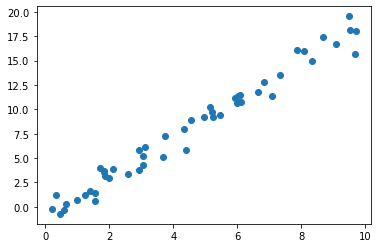

In [45]:
# As an example of this process, let’s consider a simple linear regression
# that is, the common case of fitting a line to x, y data. 
# We will use the following simple data for our regression example :

import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)  # RandomState() and seed() both define seed 
#if the seed is same same random number will be genrated

# we are randomly producing some 50 (x,y) values
x = 10 * rng.rand(50)  
y = 2 * x - 1 + rng.randn(50)

# making a scatter plot, to see our 50 points 
plt.scatter(x, y);
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# For our linear regression example, we can instantiate the LinearRegression
# class and specify that we would like to fit the intercept using 
# the fit_intercept hyperparameter:

model = LinearRegression(fit_intercept=True)  
model

# If fit_intercept set to False, no intercept will be used in calculations

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
X = x[:, np.newaxis] # we made the 1D array of (50,) to(50,1)
X.shape

(50, 1)

In [49]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model.coef_    # indicates the slope

array([1.9776566])

In [51]:
model.intercept_   # indicates the y-intercept

-0.903310725531111

In [52]:
xfit = np.linspace(-1, 11) 
# it creates 50 uniformly spaced values in range of -1 to 11


# How line space works ?
# https://www.sharpsightlabs.com/blog/numpy-linspace/

In [53]:
# we need to re-shape these x values into a [n_samples, n_features]
# features matrix, after which we can feed it to the model:
    
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

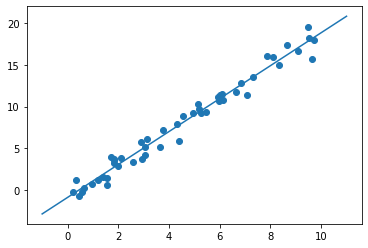

In [54]:
# let’s visualize the results by plotting first the raw data, 
# and then this model fit:

plt.scatter(x, y) # plots the input points
plt.plot(xfit, yfit) # plots the regression line.
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)
#if random_state is not given everyone will get different split data
# default train data -->75%
# thereby test data -->25%

In [56]:
# With the data arranged, we can follow our steps to predict the labels:

# 1. choose model class
from sklearn.naive_bayes import GaussianNB 

# 2. instantiate model
model = GaussianNB() 

# 3. fit model to data
model.fit(Xtrain, ytrain) 

# 4. predict on new data
y_pred = model.predict(Xtest) 

In [57]:
# Finally, we can use the accuracy_score utility to see 
# the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9736842105263158

In [58]:
# 1. Choose the model class
from sklearn.decomposition import PCA 

# 2. Instantiate the model with hyperparameters
model = PCA(n_components=2) 

# 3. Fit to data. Notice y is not specified!
model.fit(X_iris) 

# 4. Transform the data to two dimensions
X_2D = model.transform(X_iris) 

# Now let’s plot the results. 
# A quick way to do this is to insert the results into the 
# original Iris DataFrame, and use Seaborn’s lmplot to show the results.

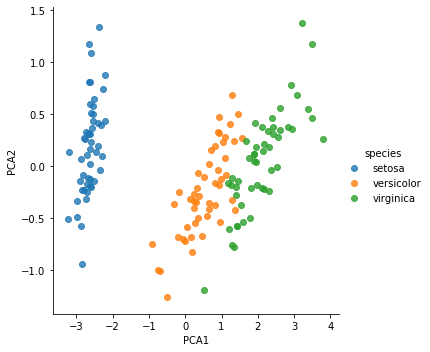

In [59]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# fit_reg=False is needed to force lmplot to draw a scatter plot
# More on fit_reg here : https://github.com/mwaskom/seaborn/issues/1452

# use hue for the most important comparison. 
# Here "species" is the paramater to classify
# To know about all parameters of lmplot : see 
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

In [60]:
# 1. Choose the model class
#import sklearn.mixture 
from sklearn import mixture   

# 2. Instantiate the model w/ hyperparameters
#model = GaussianMixture(n_components=3, covariance_type='full')
model = mixture.GaussianMixture(n_components=3, covariance_type='full')

# 3. Fit to data. Notice y is not specified!
model.fit(X_iris) 
#bcz it is unsupervised we wont pass  y parameter
# 4. Determine cluster labels
y_gmm = model.predict(X_iris) 

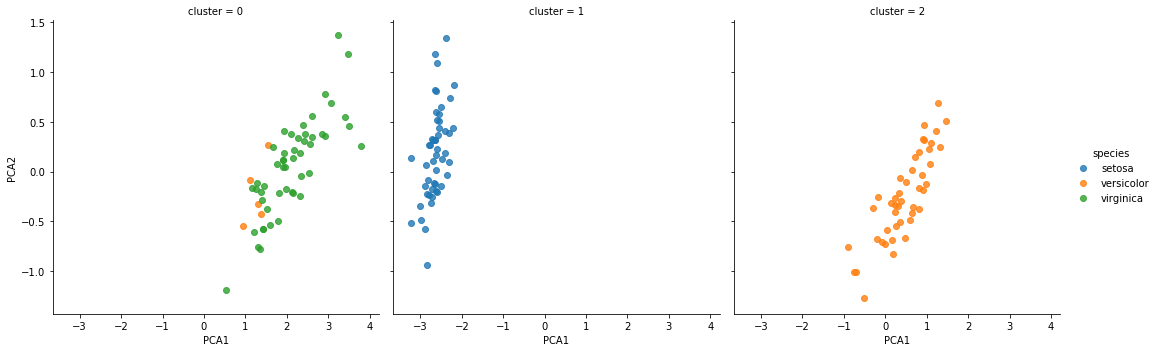

In [61]:
# we will add the cluster label to the Iris DataFrame and 
# use Seaborn to plot the results.

iris['cluster'] = y_gmm
#Hue gives colors finds unique species n gives colors accordinly
#data = iris where data is take
#PCA finds best fitting input columns
#col='cluster'---> finds clusters
#fit_reg= False bcz we dont want best fit line
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

# Recalling Scikit-learn concepts learned till now

add this to Scikit learning NB :     Good Read : When one model does not give us results , we can do something like ensemble-learning : https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2